## Data Sales E-commerce Fiktif

### Prolog

Di mini project pertama ini saya akan analisa apa yang terjadi di dalam data terkait. <br>
Data ini adalah data sales e-commerce fiktif yang dibuat oleh AI. Data ini berisi sales berdasarkan kategori yang tersedia, dan memiliki penjualan di kota mana saja serta metode pembayarannya dari bulan Januari 2024 sampai Mei 2025. Disini saya akan mencoba berbagai metode untuk Cleaning Data, Exploratory Data Analysis (EDA), Data Visualization menggunakan python serta beberapa framework untuk mempermudah analisanya.

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Nonaktifkan warning FutureWarning

### Load Dataset

In [2]:
# Load dataset
data = pd.read_csv("ecommerce_sales.csv", delimiter = ",")
# Buat salinan data
data_copy = data.copy()

# Tampilkan 5 baris pertama dari salinan
data_copy.head()

,Order_ID,Date,Product,Category,Price,Quantity,Customer_Location,Payment_Method
0,1001,2024-01-01,Tablet,Accessories,4380993,4,Medan,Bank Transfer
1,1002,2024-01-02,Smartwatch,Accessories,13620110,2,Yogyakarta,E-Wallet
2,1003,2024-01-03,Headphones,Accessories,14467111,2,Jakarta,E-Wallet
3,1004,2024-01-04,Smartwatch,Electronics,3068103,1,Yogyakarta,E-Wallet
4,1005,2024-01-05,Smartwatch,Accessories,8969872,1,Bandung,E-Wallet


Di data yang sudah di load terdapat 8 kolom terdiri dari Order_ID, Date, Product, Category, Price, Quantity, Customer_Location, Payment_Method, Total_Sales, Month_Year, Day_of_Week. Di tahap selanjutnya saya akan menggunakan teknik seperti derivation, deduplication, imputation(jika ada) dan transformation.

### Cek Informasi Data

In [3]:
# Melihat informasi dasar dataset
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order_ID           500 non-null    int64 
 1   Date               500 non-null    object
 2   Product            500 non-null    object
 3   Category           500 non-null    object
 4   Price              500 non-null    int64 
 5   Quantity           500 non-null    int64 
 6   Customer_Location  500 non-null    object
 7   Payment_Method     500 non-null    object
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


### Melihat Statistik Deskriptif

In [4]:
# Melihat statistik deskriptif dari dataset
data_copy.describe()

,Order_ID,Price,Quantity
count,500.000000,5.000000e+02,500.000000
mean,1250.500000,1.044409e+07,2.490000
std,144.481833,5.383152e+06,1.126249
min,1001.000000,5.643230e+05,1.000000
25%,1125.750000,6.065718e+06,1.000000
50%,1250.500000,1.043067e+07,2.000000
75%,1375.250000,1.464505e+07,4.000000
max,1500.000000,1.999648e+07,4.000000


In [5]:
# Buat statistik deskriptif dalam bentuk DataFrame yang lebih rapi
stats = data_copy.describe().transpose()

# Format angka agar lebih mudah dibaca (dengan koma dan tanpa notasi eksponensial)
stats = stats.map(lambda x: f"{x:,.2f}")

stats

,count,mean,std,min,25%,50%,75%,max
Order_ID,500.00,"1,250.50",144.48,"1,001.00","1,125.75","1,250.50","1,375.25","1,500.00"
Price,500.00,"10,444,087.15","5,383,152.40","564,323.00","6,065,717.50","10,430,667.50","14,645,047.00","19,996,485.00"
Quantity,500.00,2.49,1.13,1.00,1.00,2.00,4.00,4.00


### Cek Jumlah Data Hilang (Missing Values)

In [6]:
# Menampilkan data atau value kosong di setiap kolom
data_copy.isnull().sum()

Order_ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Customer_Location    0
Payment_Method       0
dtype: int64

### Mengubah Kolom Date ke Format Datetime 

In [7]:
# Ubah kolom Date menjadi datetime
data_copy["Date"] = pd.to_datetime(data_copy["Date"])

data_copy.dtypes

Order_ID                      int64
Date                 datetime64[ns]
Product                      object
Category                     object
Price                         int64
Quantity                      int64
Customer_Location            object
Payment_Method               object
dtype: object

### Filter Date (Januari 2024 - April 2025) 

In [8]:
# Menampilkan date yang di perlukan saja yaitu dari Januari 2024 sampai April 2025
start_date = "2024-01-01"
end_date = "2025-05-01"

data_copy = data_copy[(data_copy["Date"] >= start_date) & (data_copy["Date"] < end_date)]

data_copy

,Order_ID,Date,Product,Category,Price,Quantity,Customer_Location,Payment_Method
0,1001,2024-01-01,Tablet,Accessories,4380993,4,Medan,Bank Transfer
1,1002,2024-01-02,Smartwatch,Accessories,13620110,2,Yogyakarta,E-Wallet
2,1003,2024-01-03,Headphones,Accessories,14467111,2,Jakarta,E-Wallet
3,1004,2024-01-04,Smartwatch,Electronics,3068103,1,Yogyakarta,E-Wallet
4,1005,2024-01-05,Smartwatch,Accessories,8969872,1,Bandung,E-Wallet
...,...,...,...,...,...,...,...,...
481,1482,2025-04-26,Tablet,Accessories,8695810,3,Yogyakarta,Credit Card
482,1483,2025-04-27,Smartphone,Accessories,7685197,4,Surabaya,Debit Card
483,1484,2025-04-28,Smartwatch,Accessories,7214301,4,Yogyakarta,E-Wallet
484,1485,2025-04-29,Laptop,Accessories,11692304,4,Surabaya,Bank Transfer


### Mengecek & Menghapus data duplikasi (Jika Ada)

In [9]:
# Cek jumlah duplikasi
print("Jumlah duplikasi", data_copy.duplicated().sum())

# Hapus duplikasi jika ada
data_copy = data_copy.drop_duplicates()

Jumlah duplikasi 0


### Menambahkan Kolom Total Sales

In [10]:
# Menambahkan kolom total_sales
data_copy["Total_Sales"] = data_copy["Price"] * data_copy["Quantity"]

# Tampilkan data untuk cek apakah berhasil
data_copy[["Price", "Quantity", "Total_Sales"]]

,Price,Quantity,Total_Sales
0,4380993,4,17523972
1,13620110,2,27240220
2,14467111,2,28934222
3,3068103,1,3068103
4,8969872,1,8969872
...,...,...,...
481,8695810,3,26087430
482,7685197,4,30740788
483,7214301,4,28857204
484,11692304,4,46769216


### Analisis Total Penjualan Secara Menyeluruh

In [11]:
# Hitung total penjualan keseluruhan
total_sales = data_copy["Total_Sales"].sum()

# Format angka agar lebih rapih
total_sales_formatted = f"{total_sales:,.2f}"

# Menunjukan hasilnya
print(f"Total Penjualan keseluruhan: Rp {total_sales_formatted}")

Total Penjualan keseluruhan: Rp 12,606,791,998.00


Dari hasil diatas terlihat total penjualan keseluruhan ada lebih dari 12 Miliar Rupiah.

### Visualisasi Tren Penjualan dari Waktu ke Waktu

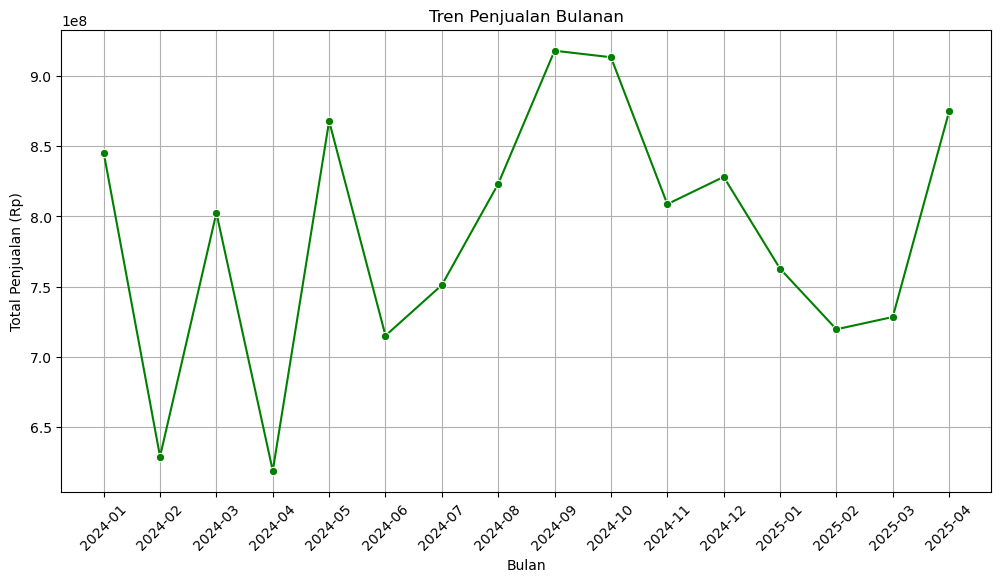

In [12]:
# Buat kolom bulan & tahun dari kolom Date
data_copy["Month_Year"] = data_copy["Date"].dt.to_period("M")

# Filter data untuk rentang waktu yang diinginkan
data_filtered = data_copy[(data_copy["Date"] >= "24-01-01") & 
                            (data_copy["Date"] < "2025-05-01")]

# Hitung total penjualan per bulan
monthly_sales = data_filtered.groupby("Month_Year")["Total_Sales"].sum().reset_index()

#Ubah Month_Year menjadi string agar lebih mudah di-plot
monthly_sales["Month_Year"] = monthly_sales["Month_Year"].astype(str)

# Plot grafik penjualan bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month_Year", y="Total_Sales", 
            marker="o", color="g")

# Format plot
plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan (Rp)")
plt.title("Tren Penjualan Bulanan")
plt.grid(True)

# Menampilkan Grafik
plt.show()

Dari line chart di atas periode Januari 2024 sampai Juni 2024 adanya naik turun sales atau tidak stabil untuk salesnya. Adanya kenaikan dari Juni 2024 sampai September 2024 dan setelah itu adanya penurunan sampai Maret 2025. Namun di April 2025 adanya kenaikan sales. Karna di Mei 2025 datanya tidak lengkap maka tidak ditampilkan.

In [13]:
# Menampilkan detail sales periode Januari 2024 April 2025
monthly_sales["Total_Sales"] = monthly_sales["Total_Sales"].apply(lambda x:f"{x:,.0f}")

monthly_sales

,Month_Year,Total_Sales
0,2024-01,"845,500,887"
1,2024-02,"628,861,143"
2,2024-03,"802,565,969"
3,2024-04,"618,733,138"
4,2024-05,"867,949,543"
5,2024-06,"715,010,176"
6,2024-07,"751,078,487"
7,2024-08,"823,219,217"
8,2024-09,"918,100,508"
9,2024-10,"913,458,596"


### Analisis Kategori Produk Terlaris

In [14]:
# Hitung total penjualan per kategori
category_sales = data_copy.groupby("Category")["Total_Sales"].sum().reset_index()

# Urutkan dari yang terbesar ke terkecil
category_sales = category_sales.sort_values(by = "Total_Sales", ascending = False)

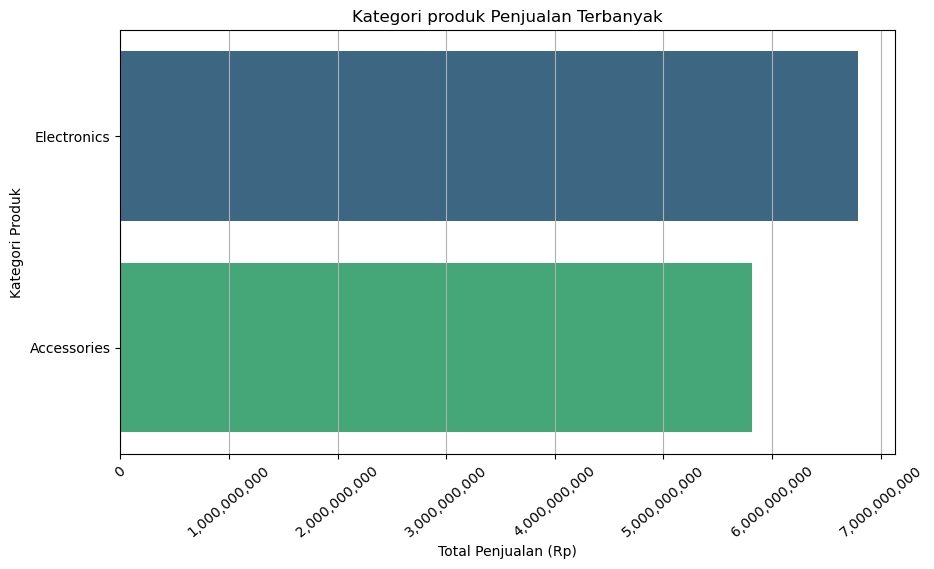

In [15]:
# Plot bar chart
plt.figure(figsize=(10,5.5))
sns.barplot(data = category_sales, x="Total_Sales", y="Category", palette="viridis")

# Format sumbu X agar angka mudah dibaca
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _:f'{int(x):,}'))

# Format Plot
plt.xlabel("Total Penjualan (Rp)")
plt.ylabel("Kategori Produk")
plt.title("Kategori produk Penjualan Terbanyak")
plt.xticks(rotation=40)
plt.grid(axis="x")

# Menampilkan grafik
plt.show()

Dari bar chart terlampir bisa disimpulkan kategori dengan sales tertinggi ada di Electronics dan Accessories. Total dari penjualan dari 2 kategori tersebut kurang lebih 13 Miliar Rupiah.

### Analisis Metode Pembayaran Paling Populer

In [16]:
# Hitung jumlah transaksi per metode pembayaran
payment_counts = data_copy["Payment_Method"].value_counts().reset_index()
payment_counts.columns = ["Payment_Method", "Transaction_Count"]

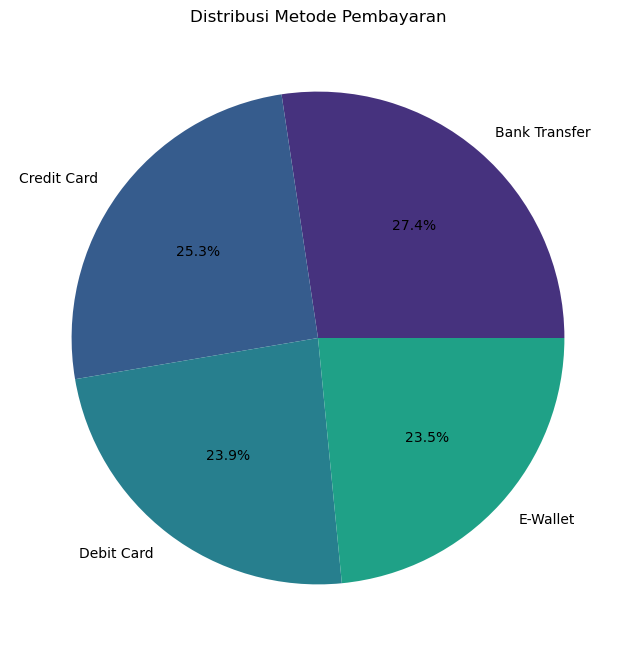

In [17]:
# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(payment_counts["Transaction_Count"], labels=payment_counts["Payment_Method"], autopct="%1.1f%%", colors=sns.color_palette("viridis"))

# Format plot
plt.title("Distribusi Metode Pembayaran")
plt.show()

Dari Pie chart menampilkan metode pembayaran yang sering digunakan, dari yang tertinggi menggunakan bank transfer dan yang terendah menggunakan e-wallet

### Analisis Metode Pembayaran Populer

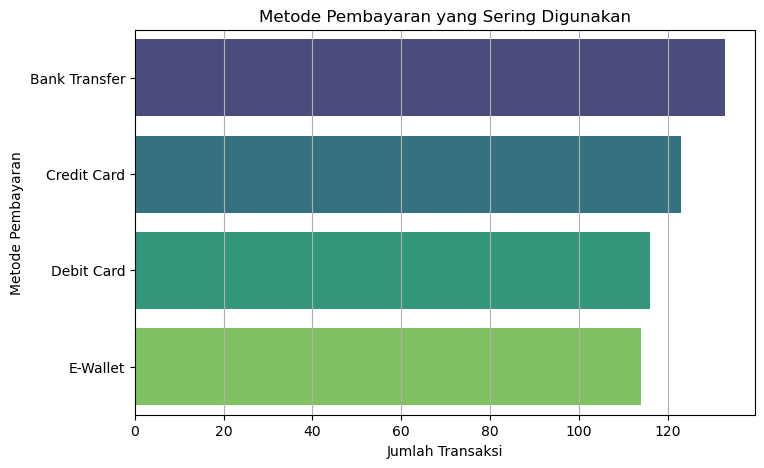

In [18]:
# Plot metode pembayaran
plt.figure(figsize=(8,5))
sns.barplot(data=payment_counts, x="Transaction_Count", y="Payment_Method", palette="viridis")

# Format Plot
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Metode Pembayaran")
plt.title("Metode Pembayaran yang Sering Digunakan")
plt.grid(axis="x")

plt.show()

Tidak jauh beda dengan pie chart sebelumnya, di bar chart ini menampilkan total pemakaian dari metode pembayaran yang sering digunakan yaitu bank transfer dan terendah e-wallet

### Analisis Lokasi Pelanggan dengan Transaksi Terbanyak

In [19]:
# Hitung jumlah transaksi per lokasi pelanggan
location_sales = data_copy["Customer_Location"].value_counts().reset_index()
location_sales.columns = ["Customer_Location", "Transaction_Count"]

location_sales = location_sales.sort_values(by="Transaction_Count", ascending=False)

location_sales

,Customer_Location,Transaction_Count
0,Surabaya,106
1,Medan,105
2,Yogyakarta,102
3,Jakarta,94
4,Bandung,79


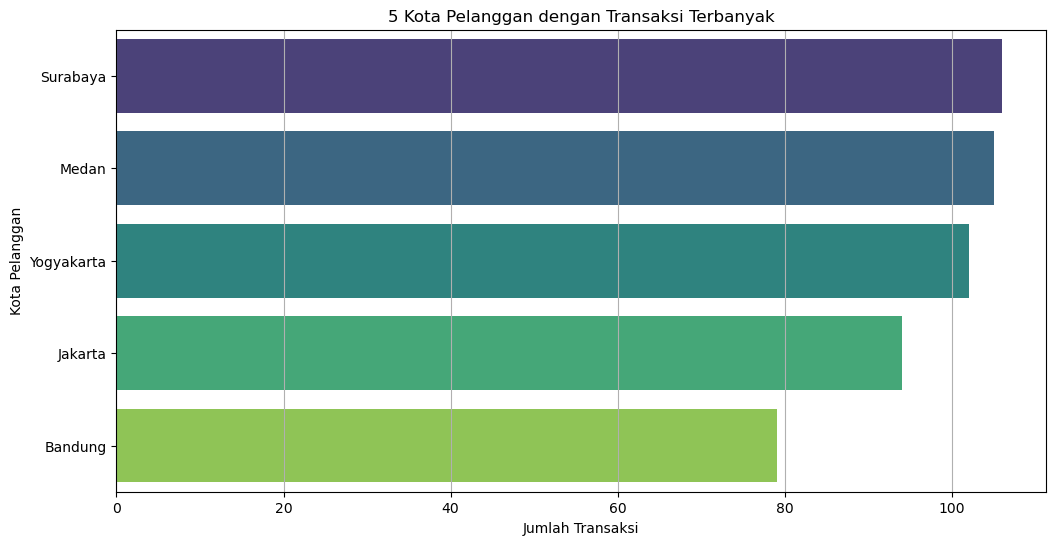

In [20]:
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=location_sales, x="Transaction_Count", y="Customer_Location", palette="viridis")

# Format plot
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Kota Pelanggan")
plt.title("5 Kota Pelanggan dengan Transaksi Terbanyak")
plt.grid(axis="x")

plt.show()

Grapik di atas menampilkan kota dengan jumlah transaksi terbanyak, tertinggi berada di Medan dan terendah berada di Bandung.

### Segmentasi Pelanggan Berdasarkan Total Pembelian


In [21]:
# Hitung total belanja per pelanggan
customer_spending = data_copy.groupby("Customer_Location")["Total_Sales"].sum().reset_index()

# Urutkan berdasarkan pengeluaran tertinggi
customer_spending = customer_spending.sort_values(by="Total_Sales", ascending=False)

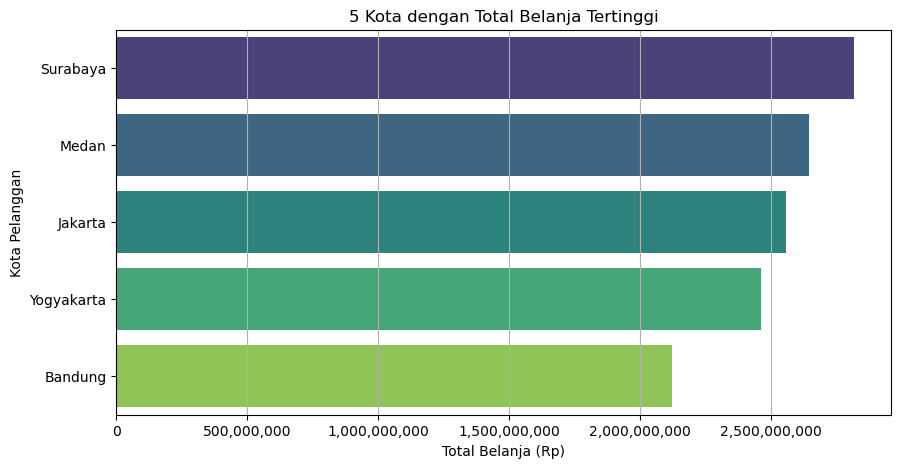

In [22]:
# Konversi menjadi numerik
customer_spending["Total_Sales"] = pd.to_numeric(customer_spending["Total_Sales"], errors="coerce")
customer_spending["Customer_Location"] = customer_spending["Customer_Location"].astype(str)

# Plot grafik total belanja pelanggan
plt.figure(figsize=(10,5))
sns.barplot(data=customer_spending.head(5), x="Total_Sales", y="Customer_Location", palette="viridis")

# Format sumbu X agar angka mudah dibaca
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _:f'{int(x):,}'))

# Format Plot
plt.xlabel("Total Belanja (Rp)")
plt.ylabel("Kota Pelanggan")
plt.title("5 Kota dengan Total Belanja Tertinggi")
plt.grid(axis="x")

plt.show()

Berdasarkan kota dalam total penjualan Surabaya memiliki penjualan tertinggi dengan total sales lebih 2.8 Miliar Rupiah dan Bandung yang terendah dengan total sales 2.1 Miliar Rupiah.


In [23]:
# Menampilkan total sales berdasarkan kota dengan format koma di setiap angkanya
customer_spending["Total_Sales"] = customer_spending["Total_Sales"].apply(lambda x: f"{x:,.0f}")

customer_spending

,Customer_Location,Total_Sales
3,Surabaya,"2,819,451,192"
2,Medan,"2,644,791,118"
1,Jakarta,"2,556,541,059"
4,Yogyakarta,"2,461,801,491"
0,Bandung,"2,124,207,138"


### Pola Pembelian Berdasarkan Hari dalam Seminggu

In [24]:
# Buat kolom baru untuk hari dalam seminggu
data_copy["Day_of_Week"] = data_copy["Date"].dt.day_name()

# Hitung jumlah transaksi per hari
sales_per_day = data_copy["Day_of_Week"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
    ]).reset_index()
sales_per_day.columns = ["Day_of_Week", "Transaction_Count"]

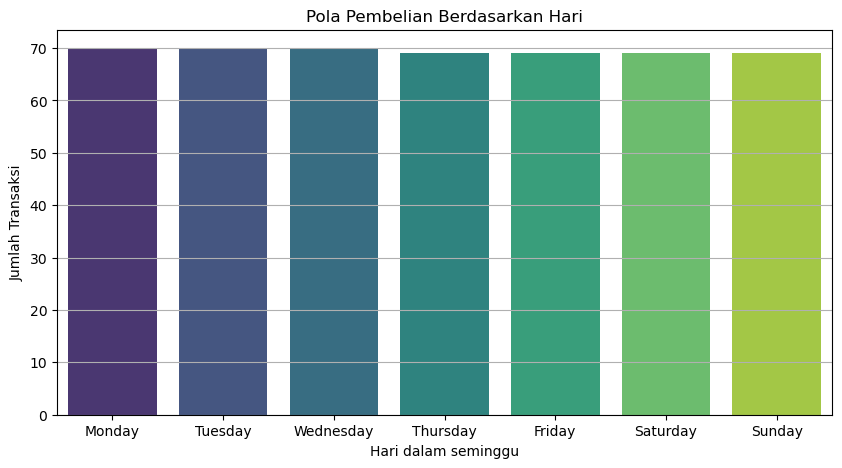

In [25]:
# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=sales_per_day, x="Day_of_Week", y="Transaction_Count", palette="viridis")

# Format plot
plt.xlabel("Hari dalam seminggu")
plt.ylabel("Jumlah Transaksi")
plt.title("Pola Pembelian Berdasarkan Hari")
plt.grid(axis="y")

plt.show()

Bar chart menampilkan pola pembelian dalam seminggu yang sering dilakukan. Transaksi di hari Senin, Selasa dan Rabu lebih banyak di banding hari yang lain. Namun Senin sampai Minggu tidak jauh berbeda jumalh transaksinya.

### Analisis Tren Penjualan Berdasarkan Waktu

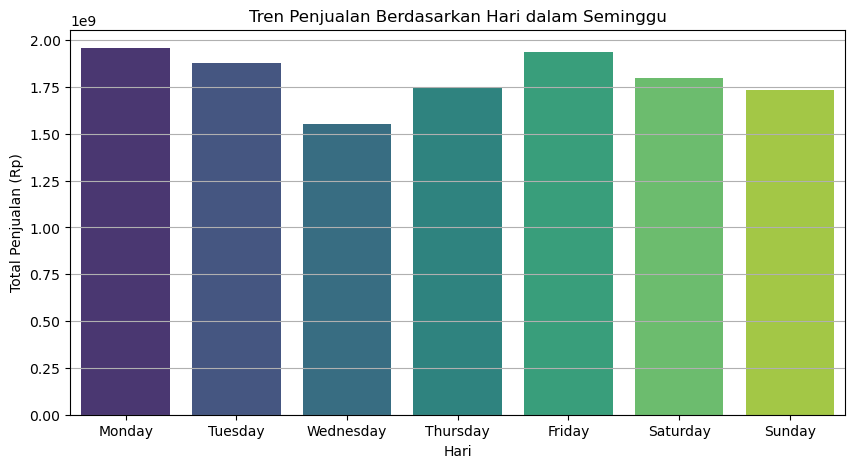

In [26]:
# Ambil Hari dari kolom Date
data_copy["Day_of_Week"] = data_copy["Date"].dt.day_name()

# Hitung total penjualan per hari dalam seminggu
daily_sales = data_copy.groupby("Day_of_Week")["Total_Sales"].sum().reset_index()

# Urutkan hari sesuai dengan urutan minggu
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sales["Day_of_Week"] = pd.Categorical(daily_sales["Day_of_Week"], 
                                            categories=days_order, ordered=True)
daily_sales = daily_sales.sort_values("Day_of_Week")

# Plot grafik tren penjualan per hari
plt.figure(figsize=(10,5))
sns.barplot(data=daily_sales, x="Day_of_Week", 
            y="Total_Sales", palette="viridis")

# Format plot
plt.xlabel("Hari")
plt.ylabel("Total Penjualan (Rp)")
plt.title("Tren Penjualan Berdasarkan Hari dalam Seminggu")
plt.grid(axis="y")

plt.show()

Total sales berdasarkan hari dalam seminggu. Senin memiliki sales tertinggi dengan total sales hampir 2 miliar dan Rabu memilki sales terendah dengna total sales lebih dari 1.5 miliar.

### Analisis Produk dengan Penjualan Tertinggi & Terendah

In [27]:
# Hitung jumlah transaksi per produk
product_sales = data_copy["Product"].value_counts().reset_index()
product_sales.columns = ["Product", "Transaction_Count"]

# Mengambil 5 produk transaksi terbanyak
top_products = product_sales.head(5)

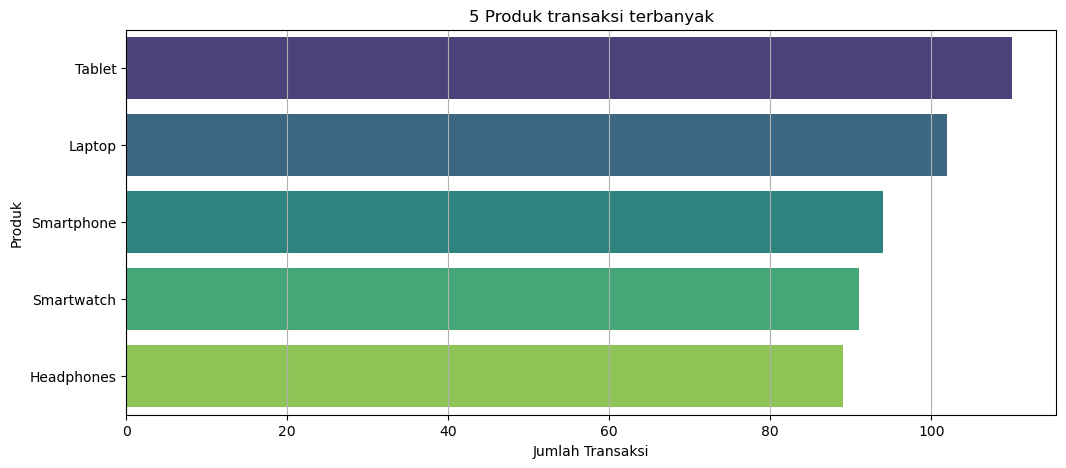

In [28]:
# Plot bar chart produk transaksi terbanyak
plt.figure(figsize=(12, 5))
sns.barplot(data=top_products, x="Transaction_Count", y="Product", palette="viridis")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Produk")
plt.title("5 Produk transaksi terbanyak")
plt.grid(axis="x")
plt.show()

Tablet memiliki jumlah transaksi terbanyak dan headphones memiliki jumlah transaksi terendah.

### Analisis Performa Produk

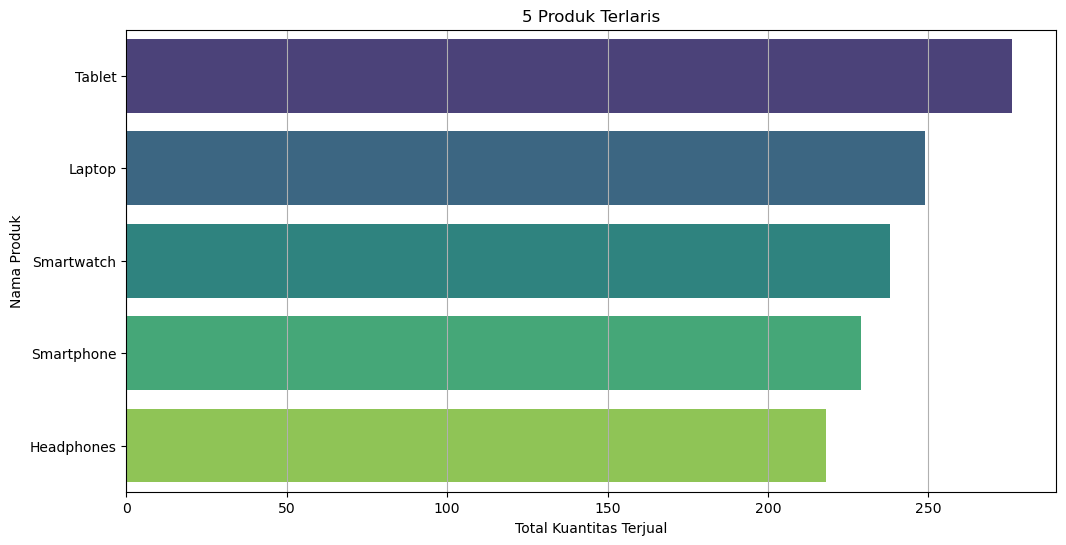

In [29]:
# Menghitung total kuantitas terjual per produk
top_products = data_copy.groupby("Product")["Quantity"].sum().reset_index()

# Urutkan berdasarkan kuantitas terbanyak
top_products = top_products.sort_values(by="Quantity", ascending=False).head(10)

# Visualisasi produk paling laris
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x="Quantity",
            y="Product", palette="viridis")
plt.xlabel("Total Kuantitas Terjual")
plt.ylabel("Nama Produk")
plt.title("5 Produk Terlaris")
plt.grid(axis="x")
plt.show()

Tablet memiliki penjulan terbanyak lebih dari 250 unit beradasarkan kuantitas, dan terendah berada di headphones terjual kurang dari 250 unit

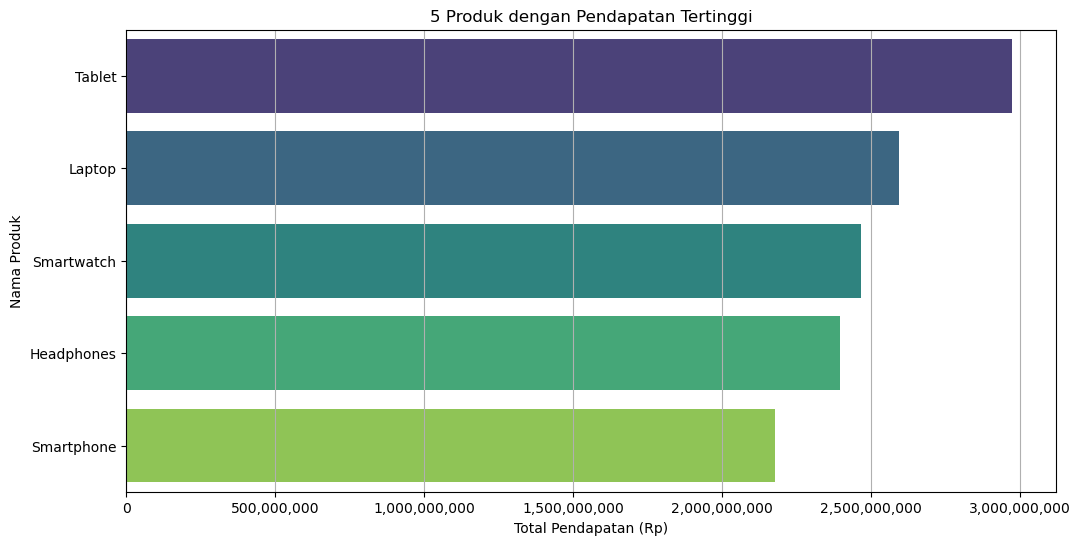

In [30]:
# Menghitung total pendapatan per produk
top_revenue_products = data_copy.groupby("Product")["Total_Sales"].sum().reset_index()

# Urutkan berdasarkan pendapatan tertinggi
top_revenue_products = top_revenue_products.sort_values(by="Total_Sales", ascending=False).head(10)

# Visualisasi produk dengan pendapatan tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_revenue_products, x="Total_Sales", 
            y="Product", palette="viridis")
plt.xlabel("Total Pendapatan (Rp)")
plt.ylabel("Nama Produk")
plt.title("5 Produk dengan Pendapatan Tertinggi")
plt.grid(axis="x")
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))  # Format angka
plt.show()


Bar chart menampilkan total sales dari produk yang dijual. Tablet memiliki sales tertinggi hampir 3 Miliar Rupiah, dan smartphone menjual kurang dari 2.5 Miliar Rupiah

### Melihat Distribusi Harga Produk yang Terjual

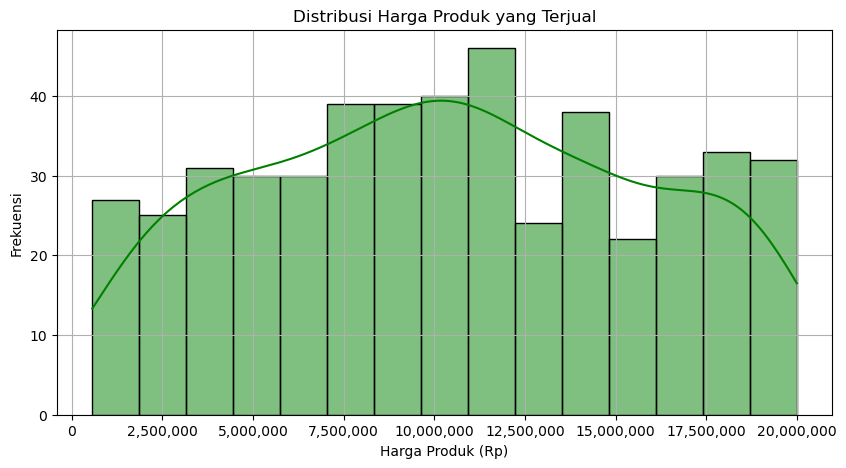

In [33]:
# Plot distribusi harga produk yang terjual
plt.figure(figsize=(10,5))
sns.histplot(data_copy["Price"], bins=15, kde=True, color="g")

# Format sumbu X agar angka mudah dibaca
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _:f'{int(x):,}'))

# Format plot
plt.xlabel("Harga Produk (Rp)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Harga Produk yang Terjual")
plt.grid(True)

plt.show()

Dari Histogram diatas menampilkan distribusi harga produk. harga tertinggi berada di kisaran harga 10 Juta sampai 12.5 Juta Rupiah, dan terendah berada di 15 juta ke atas.

### Analisis Korelasi Antara Variabel

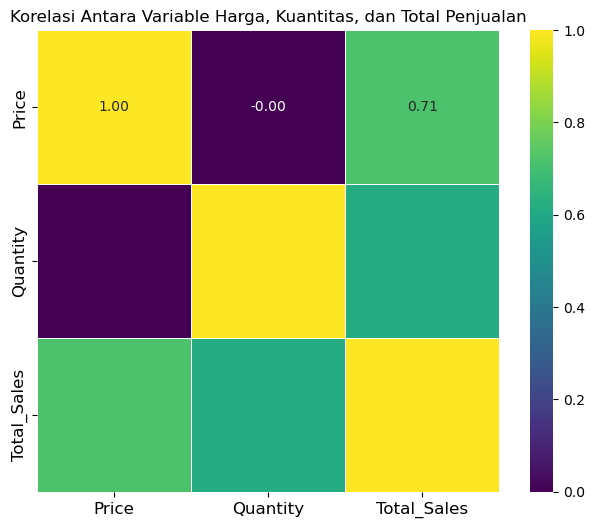

In [32]:
# Hitung korelasi antara variabel numerik
correlation_matrix = data_copy[["Price", "Quantity", "Total_Sales"]].corr()

# Plot heatmap untuk melihat korelasi
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, 
            cmap="viridis", fmt=".2f", 
            cbar=True, linewidth=0.5, square=True)

# Format plot
plt.title("Korelasi Antara Variable Harga, Kuantitas, dan Total Penjualan")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Di heatmap chat berikut menampilkan korelasi antar variabel. Mulai dari price tidak terlalu berpengaruh oleh quantitas, dan memiliki pengaruh yang kuat untuk total_sales. Kedua, quantity memengaruhi juga untuk total sales tapi tidak sekuat price.

### Kesimpulan

Dari hasil analisis saya diatas bisa disimpulkan bahwa total penjualan selama Januari 2024 - April 2025 yaitu Rp 12,606,791,998(Dua belas miliar enam ratus enam juta tujuh ratus sembilan puluh satu ribu sembilan ratus sembilan delapan rupiah). Sales tertinggi berada di September 2024 sebesar lebih dari 900 Juta Rupiah. Kategori dengan penjualan terbanyak berada di kategori Electronics dengan sales 7 Miliar Rupiah. Metode Pembayaran yang sering digunakan yaitu Bank transfer dengan persentase 27.4%. Kota dengan transaksi terbanyak berada di Surabaya dengan jumlah transaksi lebih dari 100 kali dan dengan total sales lebih dari 2.8 miliar rupiah. Dalam seminggu transaksi terbanyak ada di hari Senin, Selasa dan Rabu sebanyak 70 transaksi. Produk yang sering dibeli adalah tablet sebanyak 100 unit lebih dengan sales hampir 3 Miliar lebih.

Sekian dari analisa saya di mini project ini, Terima kasih dan See ya!!